In [1]:
import numpy as np
import scipy
import pandas
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')
sns.set_style('ticks')
sns.set_context('notebook')
import h5py
import allel; print('scikit-allel', allel.__version__)

scikit-allel 1.2.1


In [2]:
#allel.vcf_to_hdf5('/wrk/Gen_Tree/GenTree_Genome_mapping/Picea_abies/raw_SNPs.vcf', '/wrk/Gen_Tree/GenTree_Genome_mapping/Picea_abies/raw_SNPs.h5', fields='*', overwrite=True)

In [2]:
callset_fn = '/wrk/Gen_Tree/GenTree_Genome_mapping/Picea_abies/raw_SNPs.h5'
callset = h5py.File(callset_fn, mode='r')
callset

<HDF5 file "raw_SNPs.h5" (mode r)>

In [3]:
sorted(callset.keys())

['calldata', 'samples', 'variants']

In [4]:
calldata = callset['calldata']

In [5]:
calldata

<HDF5 group "/calldata" (10 members)>

In [6]:
list(calldata)

['AD', 'DP', 'GQ', 'GT', 'MIN_DP', 'PGT', 'PID', 'PL', 'RGQ', 'SB']

In [7]:
variants = allel.VariantChunkedTable(callset['variants'], 
                                     names=['POS', 'REF', 'ALT', 'DP', 'QD', 'AN', 'MQ', 'SOR', 'numalt', 'QUAL', 'MQRankSum', 'ReadPosRankSum'])
variants

<VariantChunkedTable shape=(992140,) dtype=[('POS', '<i4'), ('REF', 'O'), ('ALT', 'O', (3,)), ('DP', '<i4'), ('QD', '<f4'), ('AN', '<i4'), ('MQ', '<f4'), ('SOR', '<f4'), ('numalt', '<i4'), ('QUAL', '<f4'), ('MQRankSum', '<f4'), ('ReadPosRankSum', '<f4')]
   nbytes=68.1M cbytes=25.2M cratio=2.7
   values=h5py._hl.group.Group>

In [8]:
def plot_variant_hist(f, bins=30):
    x = variants[f][:]
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.despine(ax=ax, offset=10)
    ax.hist(x, bins=bins)
    ax.set_xlabel(f)
    ax.set_ylabel('No. variants')
    ax.set_title('Variant %s distribution' % f)

/wrk/Programs/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/wrk/Programs/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


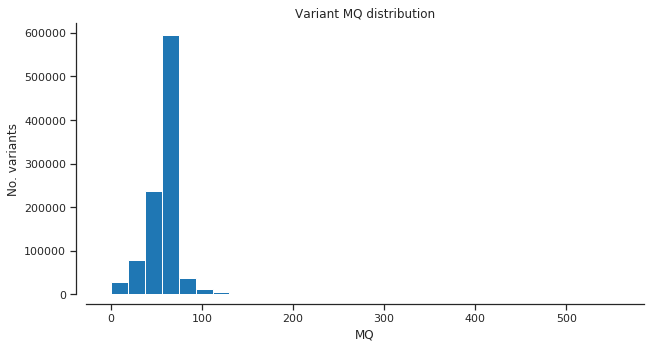

In [9]:
plot_variant_hist('MQ')

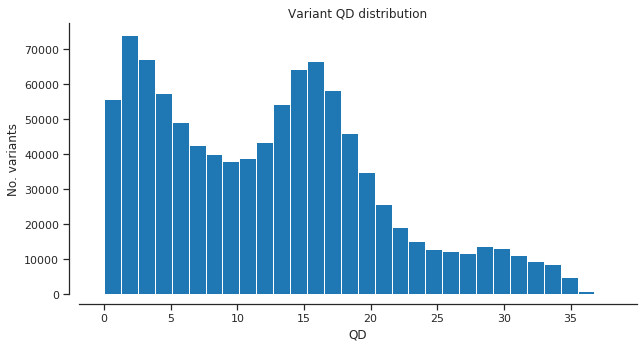

In [10]:
plot_variant_hist('QD')

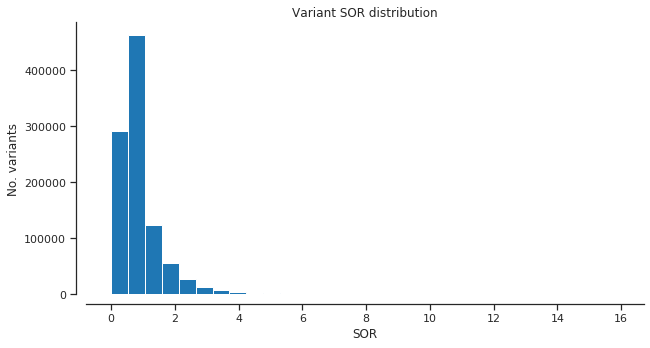

In [11]:
plot_variant_hist('SOR')

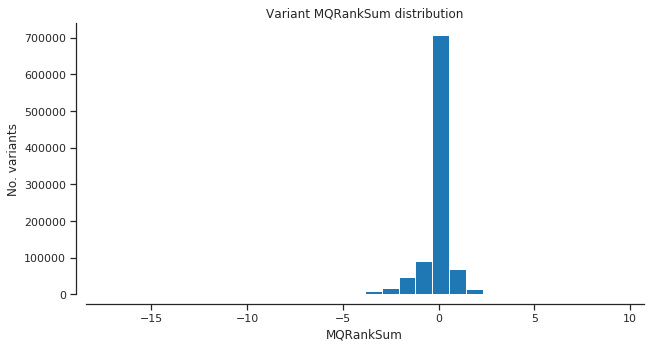

In [12]:
plot_variant_hist('MQRankSum')

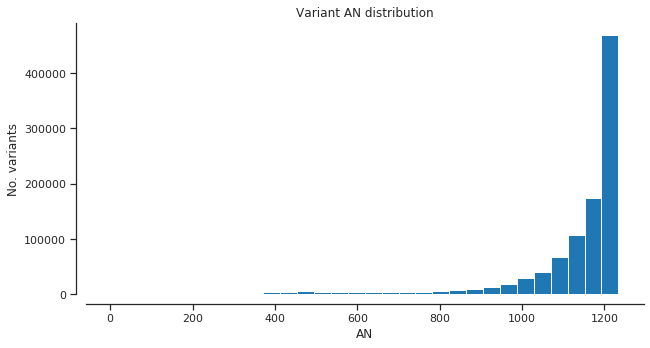

In [71]:
plot_variant_hist('AN')

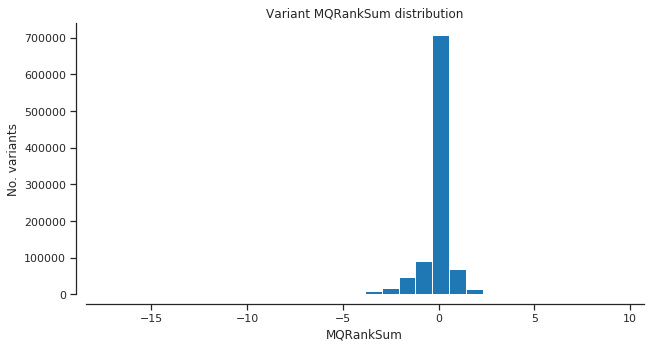

In [13]:
plot_variant_hist('MQRankSum')

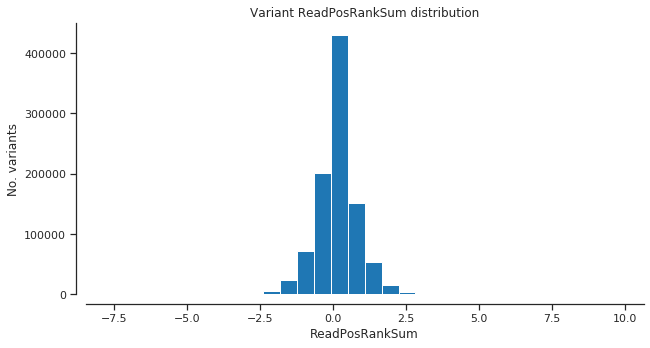

In [14]:
plot_variant_hist('ReadPosRankSum')

### Filter out positions with DP <10 and QD < 2

In [15]:
filter_expression = '(DP > 20) & (QD > 2) & (AN > 619)'
###soft filter for removing calls with very little support

In [16]:
variant_selection = variants.eval(filter_expression)[:]
variant_selection

<string>:1: RuntimeWarning: invalid value encountered in greater
<string>:1: RuntimeWarning: invalid value encountered in greater
<string>:1: RuntimeWarning: invalid value encountered in greater
<string>:1: RuntimeWarning: invalid value encountered in greater
<string>:1: RuntimeWarning: invalid value encountered in greater
<string>:1: RuntimeWarning: invalid value encountered in greater
<string>:1: RuntimeWarning: invalid value encountered in greater
<string>:1: RuntimeWarning: invalid value encountered in greater
<string>:1: RuntimeWarning: invalid value encountered in greater
<string>:1: RuntimeWarning: invalid value encountered in greater
<string>:1: RuntimeWarning: invalid value encountered in greater
<string>:1: RuntimeWarning: invalid value encountered in greater
<string>:1: RuntimeWarning: invalid value encountered in greater
<string>:1: RuntimeWarning: invalid value encountered in greater
<string>:1: RuntimeWarning: invalid value encountered in greater
<string>:1: RuntimeWarnin

array([ True,  True,  True, ...,  True,  True, False])

### How many variants were kept?

In [17]:
np.count_nonzero(variant_selection)

856832

In [18]:
calldata = callset['calldata']
calldata

<HDF5 group "/calldata" (10 members)>

In [19]:
genotypes = allel.GenotypeChunkedArray(calldata['GT'])
genotypes

<GenotypeChunkedArray shape=(992140, 619, 2) dtype=int8 chunks=(65536, 64, 2)
   nbytes=1.1G cbytes=104.3M cratio=11.2
   compression=gzip compression_opts=1
   values=h5py._hl.dataset.Dataset>

In [20]:
samples = callset['samples']
samples = list(samples)
samples

['AT_PA_05_01',
 'AT_PA_05_02',
 'AT_PA_05_04',
 'AT_PA_05_05',
 'AT_PA_05_06',
 'AT_PA_05_07',
 'AT_PA_05_08',
 'AT_PA_05_09',
 'AT_PA_05_10',
 'AT_PA_05_11',
 'AT_PA_05_12',
 'AT_PA_05_13',
 'AT_PA_05_14',
 'AT_PA_05_15',
 'AT_PA_05_16',
 'AT_PA_05_17',
 'AT_PA_05_18',
 'AT_PA_05_19',
 'AT_PA_05_20',
 'AT_PA_05_21',
 'AT_PA_05_22',
 'AT_PA_05_23',
 'AT_PA_05_24',
 'AT_PA_05_25',
 'AT_PA_06_1',
 'AT_PA_06_10',
 'AT_PA_06_11',
 'AT_PA_06_12',
 'AT_PA_06_13',
 'AT_PA_06_14',
 'AT_PA_06_15',
 'AT_PA_06_16',
 'AT_PA_06_17',
 'AT_PA_06_18',
 'AT_PA_06_19',
 'AT_PA_06_2',
 'AT_PA_06_20',
 'AT_PA_06_21',
 'AT_PA_06_22',
 'AT_PA_06_23',
 'AT_PA_06_24',
 'AT_PA_06_25',
 'AT_PA_06_3',
 'AT_PA_06_4',
 'AT_PA_06_5',
 'AT_PA_06_6',
 'AT_PA_06_7',
 'AT_PA_06_8',
 'AT_PA_06_9',
 'CH_PA_01_01',
 'CH_PA_01_02',
 'CH_PA_01_03',
 'CH_PA_01_04',
 'CH_PA_01_05',
 'CH_PA_01_06',
 'CH_PA_01_07',
 'CH_PA_01_08',
 'CH_PA_01_09',
 'CH_PA_01_10',
 'CH_PA_01_11',
 'CH_PA_01_12',
 'CH_PA_01_13',
 'CH_PA_01_14',
 

# load metadata file

In [22]:
samples_fn = '/wrk/Gen_Tree/GenTree_Genome_mapping/Picea_abies/Pabies_SAMPLES_raw_snps.txt'
samples = pandas.read_csv(samples_fn, sep='\t')
samples

,ID,Population
0,AT_PA_05_01,AT_PA_5
1,AT_PA_05_02,AT_PA_5
2,AT_PA_05_04,AT_PA_5
3,AT_PA_05_05,AT_PA_5
4,AT_PA_05_06,AT_PA_5
...,...,...
614,SE_PA_16_21,SE_PA_16
615,SE_PA_16_22,SE_PA_16
616,SE_PA_16_23,SE_PA_16
617,SE_PA_16_24,SE_PA_16


In [23]:
samples.Population.value_counts()

LT_PA_11    25
NO_PA_14    25
CH_PA_2     25
FI_PA_17    25
FI_PA_18    25
GE_PA_10    25
RU_PA_20    25
LT_PA_12    25
SE_PA_15    25
FR_PA_21    25
GE_PA_9     25
IT_PA_4     25
PL_PA_25    25
RO_PA_24    25
AT_PA_6     25
RU_PA_19    25
GR_PA_8     25
NO_PA_22    25
SE_PA_16    25
CH_PA_1     25
NO_PA_13    25
AT_PA_5     24
GR_PA_7     24
IT_PA_3     23
RU_PA_26    10
Obovata      6
Obavata      3
RO_MEGA      2
Omorika      2
Name: Population, dtype: int64

In [24]:
sample_selection = samples.Population.isin({'AT_PA_5', 'AT_PA_6', 'CH_PA_1', 'CH_PA_2', 'FI_PA_17', 'FI_PA_18',
       'FR_PA_21', 'GE_PA_9', 'GE_PA_10', 'GR_PA_7', 'GR_PA_8', 'IT_PA_3',
       'IT_PA_4', 'LT_PA_11', 'LT_PA_12', 'NO_PA_13', 'NO_PA_14',
       'NO_PA_22', 'Obavata', 'Obovata', 'Omorika', 'PL_PA_25', 'RO_MEGA',
       'RO_PA_24', 'RU_PA_19', 'RU_PA_20', 'RU_PA_26', 'SE_PA_15',
       'SE_PA_16'}).values
sample_selection[:5]

array([ True,  True,  True,  True,  True])

In [25]:
samples_subset = samples[sample_selection]
samples_subset.reset_index(drop=True, inplace=True)
samples_subset

,ID,Population
0,AT_PA_05_01,AT_PA_5
1,AT_PA_05_02,AT_PA_5
2,AT_PA_05_04,AT_PA_5
3,AT_PA_05_05,AT_PA_5
4,AT_PA_05_06,AT_PA_5
...,...,...
614,SE_PA_16_21,SE_PA_16
615,SE_PA_16_22,SE_PA_16
616,SE_PA_16_23,SE_PA_16
617,SE_PA_16_24,SE_PA_16


In [26]:
%%time
genotypes_subset = genotypes.subset(variant_selection, sample_selection)

CPU times: user 9.37 s, sys: 235 ms, total: 9.61 s
Wall time: 8.83 s


In [27]:
genotypes_subset

<GenotypeChunkedArray shape=(856832, 619, 2) dtype=int8 chunks=(1674, 619, 2)
   nbytes=1011.6M cbytes=197.6M cratio=5.1
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

### grab the allele counts for the populations

In [32]:
ac = genotypes_subset.count_alleles()
ac

<AlleleCountsChunkedArray shape=(856832, 5) dtype=int32 chunks=(26776, 5)
   nbytes=16.3M cbytes=3.7M cratio=4.4
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

### Which ones are biallelic?

In [33]:
is_biallelic_01 = ac.is_biallelic_01()[:]
ac1 = ac.compress(is_biallelic_01, axis=0)[:, :2]
ac1
##this part of the code is only for graphing the SFS, is not useful for filtering biallelic sites

array([[1093,   11],
       [1099,    5],
       [1020,   56],
       ...,
       [ 946,    2],
       [ 929,    1],
       [ 927,    1]], dtype=int32)

### Plot the SFS of the derived allele

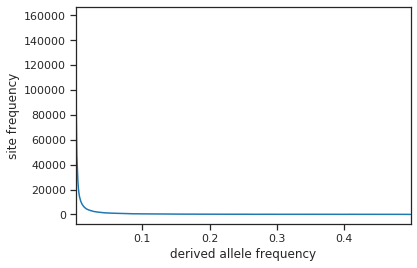

In [34]:
s = allel.sfs_folded(ac1)
allel.plot_sfs(s, yscale="linear", n=ac1.sum(axis=1).max())

### Select only biallelic variants

In [35]:
biallelic = (ac.max_allele() == 1)
###This is the filter expression for biallelic sites

In [38]:
biallelic

<ChunkedArrayWrapper shape=(856832,) dtype=bool chunks=(214208,)
   nbytes=836.8K cbytes=302.5K cratio=2.8
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [36]:
%%time
genotypes_subset_2 = genotypes_subset.compress(biallelic)
genotypes_subset_2
###subset the array genotypes_subset by keeping only biallelic sites. 

CPU times: user 3.41 s, sys: 187 ms, total: 3.6 s
Wall time: 1.11 s


<GenotypeChunkedArray shape=(699503, 619, 2) dtype=int8 chunks=(1367, 619, 2)
   nbytes=825.9M cbytes=147.0M cratio=5.6
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [37]:
n_variants = len(genotypes_subset_2)
n_variants

699503

In [38]:
pc_missing = genotypes_subset_2.count_missing(axis=0)[:] * 100 / n_variants
pc_het = genotypes_subset_2.count_het(axis=0)[:] * 100 / n_variants

In [39]:
samples.Population.unique()
###This identifiers come from the metadata file

array(['AT_PA_5', 'AT_PA_6', 'CH_PA_1', 'CH_PA_2', 'FI_PA_17', 'FI_PA_18',
       'FR_PA_21', 'GE_PA_9', 'GE_PA_10', 'GR_PA_7', 'GR_PA_8', 'IT_PA_3',
       'IT_PA_4', 'LT_PA_11', 'LT_PA_12', 'NO_PA_13', 'NO_PA_14',
       'NO_PA_22', 'Obavata', 'Obovata', 'Omorika', 'PL_PA_25', 'RO_MEGA',
       'RO_PA_24', 'RU_PA_19', 'RU_PA_20', 'RU_PA_26', 'SE_PA_15',
       'SE_PA_16'], dtype=object)

In [44]:
def plot_genotype_frequency(pc, title):
    fig, ax = plt.subplots(figsize=(29, 5))
    sns.despine(ax=ax, offset=29)
    left = np.arange(len(pc))
    palette = sns.color_palette("bright", 29)
    pop2color = {'AT_PA_5': palette[0], 
                 'AT_PA_6': palette[1], 
                 'CH_PA_1': palette[2], 
                 'CH_PA_2': palette[3], 
                 'FI_PA_17': palette[4],
                 'FI_PA_18': palette[5], 
                 'FR_PA_21': palette[6], 
                 'GE_PA_9': palette[7],
                 'GE_PA_10': palette[8],
                 'GR_PA_7': palette[9],
                 'GR_PA_8': palette[10],
                 'IT_PA_3': palette[11], 
                 'IT_PA_4': palette[12],
                 'LT_PA_11': palette[13],
                 'LT_PA_12': palette[14],
                 'NO_PA_13': palette[15],
                 'NO_PA_14': palette[16],
                 'NO_PA_22': palette[17],
                 'Obavata': palette[18],
                 'Obovata': palette[19],
                 'Omorika': palette[20],
                 'PL_PA_25': palette[21],
                 'RO_MEGA': palette[22],
                 'RO_PA_24': palette[23],
                 'RU_PA_19': palette[24],
                 'RU_PA_20': palette[25],
                 'RU_PA_26': palette[26],
                 'SE_PA_15': palette[27],
                 'SE_PA_16': palette[28]}
    colors = [pop2color[p] for p in samples.Population]
    ax.bar(left, pc, color=colors)
    ax.set_xlim(0, len(pc))
    ax.set_xlabel('Sample index')
    ax.set_ylabel('Percent calls')
    ax.set_title(title)
    handles = [mpl.patches.Patch(color=palette[0]),
               mpl.patches.Patch(color=palette[1]),
               mpl.patches.Patch(color=palette[2]),
               mpl.patches.Patch(color=palette[3]),
               mpl.patches.Patch(color=palette[4]),
               mpl.patches.Patch(color=palette[5]),
               mpl.patches.Patch(color=palette[6]),
               mpl.patches.Patch(color=palette[7]),
               mpl.patches.Patch(color=palette[8]),
               mpl.patches.Patch(color=palette[9]),
               mpl.patches.Patch(color=palette[10]),
               mpl.patches.Patch(color=palette[11]),
               mpl.patches.Patch(color=palette[12]),
               mpl.patches.Patch(color=palette[13]),
               mpl.patches.Patch(color=palette[14]),
               mpl.patches.Patch(color=palette[15]),
               mpl.patches.Patch(color=palette[16]),
               mpl.patches.Patch(color=palette[17]),
               mpl.patches.Patch(color=palette[18]),
               mpl.patches.Patch(color=palette[19]),
               mpl.patches.Patch(color=palette[20]),
               mpl.patches.Patch(color=palette[21]),
               mpl.patches.Patch(color=palette[22]),
               mpl.patches.Patch(color=palette[23]),
               mpl.patches.Patch(color=palette[24]),
               mpl.patches.Patch(color=palette[25]),
               mpl.patches.Patch(color=palette[26]),
               mpl.patches.Patch(color=palette[27]),
               mpl.patches.Patch(color=palette[28])]
    ax.legend(handles=handles, labels=['AT_PA_5', 'AT_PA_6', 'CH_PA_1', 'CH_PA_2', 'FI_PA_17', 'FI_PA_18',
       'FR_PA_21', 'GE_PA_9', 'GE_PA_10', 'GR_PA_7', 'GR_PA_8', 'IT_PA_3',
       'IT_PA_4', 'LT_PA_11', 'LT_PA_12', 'NO_PA_13', 'NO_PA_14',
       'NO_PA_22', 'Obavata', 'Obovata', 'Omorika', 'PL_PA_25', 'RO_MEGA',
       'RO_PA_24', 'RU_PA_19', 'RU_PA_20', 'RU_PA_26', 'SE_PA_15',
       'SE_PA_16'], title='Population',
              bbox_to_anchor=(1, 1), loc='upper left')

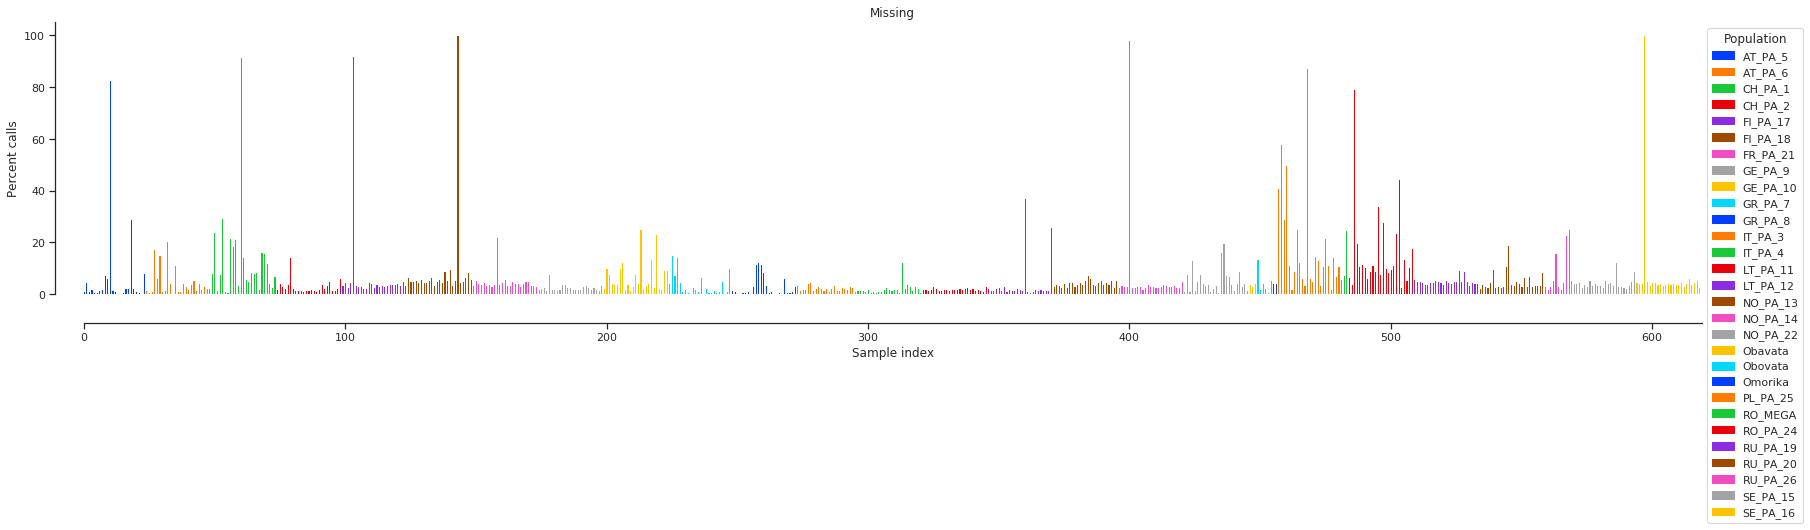

In [45]:
plot_genotype_frequency(pc_missing, 'Missing')

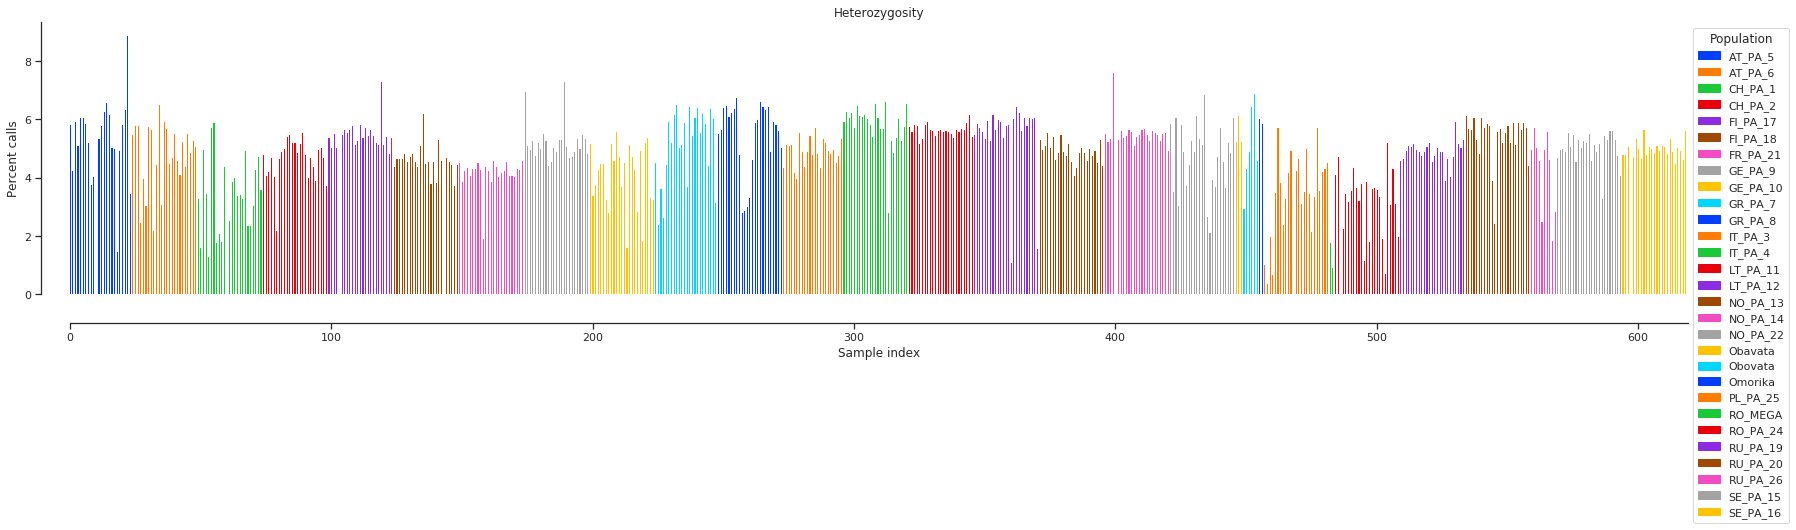

In [46]:
plot_genotype_frequency(pc_het, 'Heterozygosity')

In [160]:
np.argsort(pc_missing)[-1]
###sample with highest amount of missing data

83

In [47]:
samples = samples_subset
samples

,ID,Population
0,AT_PA_05_01,AT_PA_5
1,AT_PA_05_02,AT_PA_5
2,AT_PA_05_04,AT_PA_5
3,AT_PA_05_05,AT_PA_5
4,AT_PA_05_06,AT_PA_5
...,...,...
614,SE_PA_16_21,SE_PA_16
615,SE_PA_16_22,SE_PA_16
616,SE_PA_16_23,SE_PA_16
617,SE_PA_16_24,SE_PA_16


In [48]:
populations = samples.Population.unique()

In [49]:
populations

array(['AT_PA_5', 'AT_PA_6', 'CH_PA_1', 'CH_PA_2', 'FI_PA_17', 'FI_PA_18',
       'FR_PA_21', 'GE_PA_9', 'GE_PA_10', 'GR_PA_7', 'GR_PA_8', 'IT_PA_3',
       'IT_PA_4', 'LT_PA_11', 'LT_PA_12', 'NO_PA_13', 'NO_PA_14',
       'NO_PA_22', 'Obavata', 'Obovata', 'Omorika', 'PL_PA_25', 'RO_MEGA',
       'RO_PA_24', 'RU_PA_19', 'RU_PA_20', 'RU_PA_26', 'SE_PA_15',
       'SE_PA_16'], dtype=object)

In [50]:
ac2 = genotypes_subset_2.count_alleles()
ac2

<AlleleCountsChunkedArray shape=(699503, 2) dtype=int32 chunks=(43719, 2)
   nbytes=5.3M cbytes=1.6M cratio=3.3
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [54]:
palette = sns.color_palette("hls",33)
pop_colours = {'AT_PA_5': palette[0], 
                 'AT_PA_6': palette[1], 
                 'CH_PA_1': palette[2], 
                 'CH_PA_2': palette[3], 
                 'FI_PA_17': palette[4],
                 'FI_PA_18': palette[5], 
                 'FR_PA_21': palette[6], 
                 'GE_PA_9': palette[7],
                 'GE_PA_10': palette[8],
                 'GR_PA_7': palette[9],
                 'GR_PA_8': palette[10],
                 'IT_PA_3': palette[11], 
                 'IT_PA_4': palette[12],
                 'LT_PA_11': palette[13],
                 'LT_PA_12': palette[14],
                 'NO_PA_13': palette[15],
                 'NO_PA_14': palette[16],
                 'NO_PA_22': palette[17],
                 'Obavata': palette[18],
                 'Obovata': palette[19],
                 'Omorika': palette[20],
                 'PL_PA_25': palette[21],
                 'RO_MEGA': palette[22],
                 'RO_PA_24': palette[23],
                 'RU_PA_19': palette[24],
                 'RU_PA_20': palette[25],
                 'RU_PA_26': palette[26],
                 'SE_PA_15': palette[27],
                 'SE_PA_16': palette[28]        
    
     }

In [55]:
def plot_pca_coords(coords, model, pc1, pc2, ax, sample_population):
    sns.despine(ax=ax, offset=5)
    x = coords[:, pc1]
    y = coords[:, pc2]
    for pop in populations:
        flt = (sample_population == pop)
        ax.plot(x[flt], y[flt], marker='o', linestyle=' ', color=pop_colours[pop], 
                label=pop, markersize=6, mec='k', mew=.5)
    ax.set_xlabel('PC%s (%.1f%%)' % (pc1+1, model.explained_variance_ratio_[pc1]*100))
    ax.set_ylabel('PC%s (%.1f%%)' % (pc2+1, model.explained_variance_ratio_[pc2]*100))
    

def fig_pca(coords, model, title, sample_population=None):
    if sample_population is None:
        sample_population = samples.Population.values
    # plot coords for PCs 1 vs 2, 3 vs 4
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(1, 2, 1)
    plot_pca_coords(coords, model, 0, 1, ax, sample_population)
    ax = fig.add_subplot(1, 2, 2)
    plot_pca_coords(coords, model, 2, 3, ax, sample_population)
    ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
    fig.suptitle(title, y=1.02)
    fig.tight_layout()

In [56]:
flt = (ac2[:, :2].min(axis=1) > 1)
gf = genotypes_subset_2.compress(flt, axis=0)
gn = gf.to_n_alt()
gn

<ChunkedArrayWrapper shape=(540545, 619) dtype=int8 chunks=(2112, 619)
   nbytes=319.1M cbytes=48.0M cratio=6.7
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [57]:
coords1, model1 = allel.pca(gn, n_components=10, scaler='patterson')

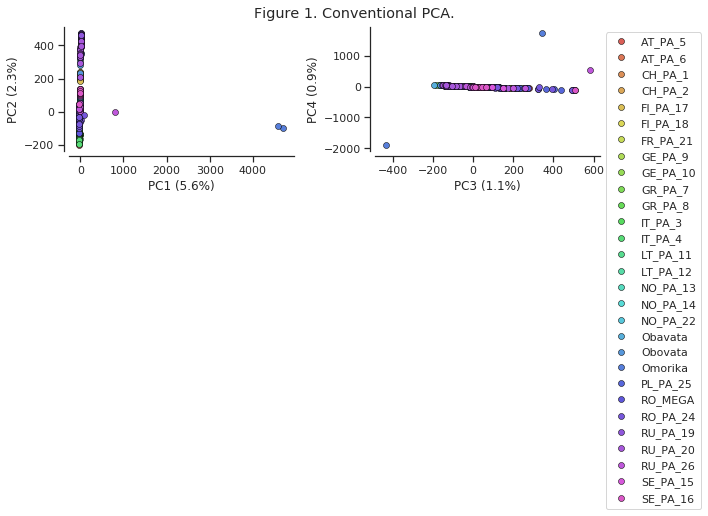

In [58]:
fig_pca(coords1, model1, 'Figure 1. Conventional PCA.')

In [60]:
weirdos = coords1[:,0]>800
samples[weirdos]
###filter samples base in PC2. Expression gives a list samples above 500

,ID,Population
455,Omorika_01,Omorika
456,Omorika_02,Omorika
568,RU_PA_26_11,RU_PA_26


In [61]:
samples2 = samples[~weirdos]

In [62]:
samples2

,ID,Population
0,AT_PA_05_01,AT_PA_5
1,AT_PA_05_02,AT_PA_5
2,AT_PA_05_04,AT_PA_5
3,AT_PA_05_05,AT_PA_5
4,AT_PA_05_06,AT_PA_5
...,...,...
614,SE_PA_16_21,SE_PA_16
615,SE_PA_16_22,SE_PA_16
616,SE_PA_16_23,SE_PA_16
617,SE_PA_16_24,SE_PA_16


In [63]:
allT = np.repeat(True, len(genotypes_subset_2))

In [64]:
genotypes_subset_3 = genotypes_subset_2.subset(allT, ~weirdos)

In [65]:
genotypes_subset_3

<GenotypeChunkedArray shape=(699503, 616, 2) dtype=int8 chunks=(1367, 616, 2)
   nbytes=821.9M cbytes=145.9M cratio=5.6
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [66]:
def fig_pca(coords, model, title, sample_population=None):
    if sample_population is None:
        sample_population = samples2.Population.values
    # plot coords for PCs 1 vs 2, 3 vs 4
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(1, 2, 1)
    plot_pca_coords(coords, model, 0, 1, ax, sample_population)
    ax = fig.add_subplot(1, 2, 2)
    plot_pca_coords(coords, model, 2, 3, ax, sample_population)
    ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
    fig.suptitle(title, y=1.02)
    fig.tight_layout()

In [67]:
ac3 = genotypes_subset_3.count_alleles()
ac3

<AlleleCountsChunkedArray shape=(699503, 2) dtype=int32 chunks=(43719, 2)
   nbytes=5.3M cbytes=1.6M cratio=3.3
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [68]:
flt2 = (ac3[:, :2].min(axis=1) > 1)
gf2 = genotypes_subset_3.compress(flt2, axis=0)
gn2 = gf2.to_n_alt()

In [69]:
coords2, model2 = allel.pca(gn2, n_components=10, scaler='patterson')

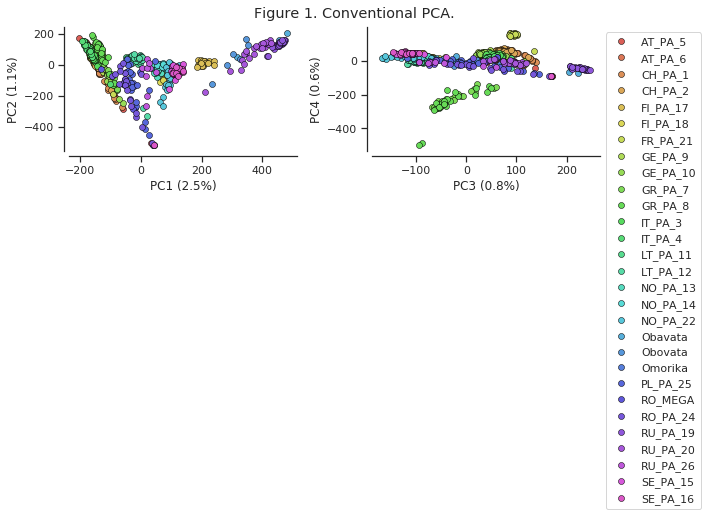

In [70]:
fig_pca(coords2, model2, 'Figure 1. Conventional PCA.')